# DRILL: Prepare the Data
Unit 2 / Lesson 4 / Project 2

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features. 
Robbery and Murder are currently continuous variables. 
For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.
You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.

Don't forget basic data cleaning procedures, either!
Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# suppress annoying harmless error
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
warnings.filterwarnings("ignore",category =RuntimeWarning)

In [2]:
PATH = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

df_raw = pd.read_csv(PATH, skiprows=[0,1,2,3])
df_raw.columns = ['city', 'pop', 'violent_crime', 'murder', 'rape_revised', 'rape_legacy',
              'robbery', 'assault', 'property_crime', 'burglary', 'larceny',
              'vehical_theft', 'arson']
df = df_raw.loc[:,['city', 'pop', 'murder', 'robbery', 'property_crime']]

df.head()

,city,pop,murder,robbery,property_crime
0,Adams Village,"1,861",0.000,0,12
1,Addison Town and Village,"2,577",0.000,0,24
2,Akron Village,"2,846",0.000,0,16
3,Albany,"97,956",8.000,227,"4,090"
4,Albion Village,"6,388",0.000,4,223


In [3]:
# clean population data
df['pop'] = df['pop'].str.replace(',','')

df['pop'].value_counts()

df['pop'] = df['pop'].apply(pd.to_numeric, errors='coerce')

df['pop'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: pop, dtype: float64

In [4]:
# create a categorical murder feature
df['murder_raw'] = df['murder']

display(df['murder'].describe())

df['murder'] = df['murder'].astype('bool')

df['murder'].describe()

count   348.000
mean      1.566
std      18.304
min       0.000
25%       0.000
50%       0.000
75%       0.000
max     335.000
Name: murder, dtype: float64

count       351
unique        2
top       False
freq        299
Name: murder, dtype: object

In [5]:
# create a categorical robbery feature
df['robbery'] = df['robbery'].apply(pd.to_numeric, errors='coerce')

df['robbery_raw'] = df['robbery']

display(df['robbery'].describe())

df['robbery'] = df['robbery'].astype('bool')

df['robbery'].describe()

count   346.000
mean     14.098
std      64.046
min       0.000
25%       0.000
50%       1.000
75%       5.000
max     918.000
Name: robbery, dtype: float64

count      351
unique       2
top       True
freq       212
Name: robbery, dtype: object

In [6]:
# create a populaton squared feature
df['pop_sq'] = df['pop']**2

In [7]:
# clean the data
display(df['pop'].sort_values().tail(10))
df.query('pop > 118295')

3       97956.000
7      118296.000
310    143834.000
346    199134.000
272    210562.000
35     258789.000
216   8396126.000
348           nan
349           nan
350           nan
Name: pop, dtype: float64

,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq
7,Amherst Town,118296.000,True,True,"2,118",1.000,31.000,13993943616.000
35,Buffalo,258789.000,True,True,"12,491",47.000,nan,66971746521.000
216,New York,8396126.000,True,True,"141,971",335.000,nan,70494931807876.000
272,Rochester,210562.000,True,True,"10,051",42.000,918.000,44336355844.000
310,Syracuse,143834.000,True,True,"6,473",21.000,400.000,20688219556.000
346,Yonkers,199134.000,True,True,"2,368",6.000,390.000,39654349956.000


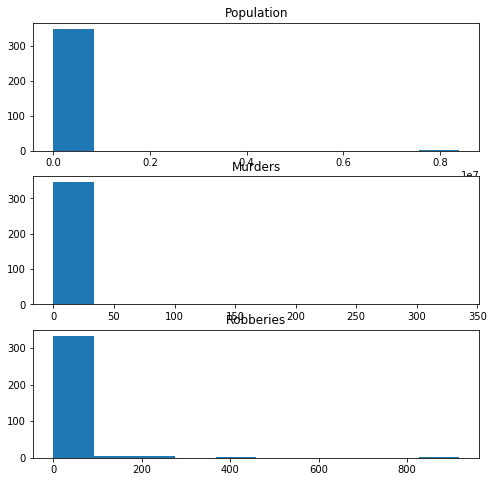

In [8]:
fig = plt.figure(figsize=[8,8])

plt.subplot(3, 1, 1)
plt.hist(df['pop'])
plt.title('Population')

plt.subplot(3, 1, 2)
plt.hist(df['murder_raw'])
plt.title('Murders')

plt.subplot(3, 1, 3)
plt.hist(df['robbery_raw'])
plt.title('Robberies')

plt.tight_layout
plt.show()

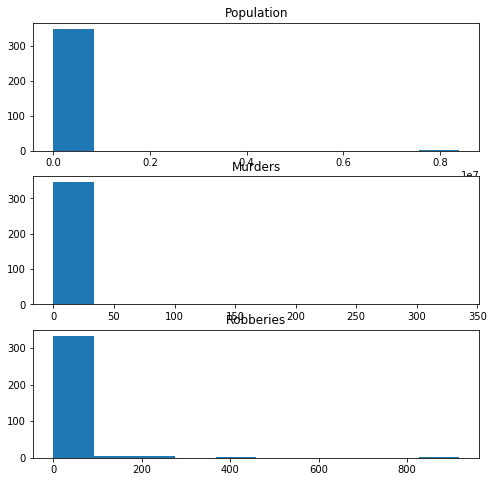

In [10]:
#df = df.drop(df[df['pop'] > 18427.500].index)
#df = df.drop(df[df['murder_raw'] > 300].index)
#df = df.drop(df[df['robbery_raw'] > 600].index)

fig = plt.figure(figsize=[8,8])

plt.subplot(3, 1, 1)
plt.hist(df['pop'])
plt.title('Population')

plt.subplot(3, 1, 2)
plt.hist(df['murder_raw'])
plt.title('Murders')

plt.subplot(3, 1, 3)
plt.hist(df['robbery_raw'])
plt.title('Robberies')

plt.tight_layout
plt.show()

In [15]:
# clean the data
#display(df['pop'].sort_values().tail(10))
#display(df['murder_raw'].sort_values().tail(10))
#display(df['robbery_raw'].sort_values().tail(10))

display(df.query('pop > 118296'))
display(df.query('murder_raw > 8'))
display(df.query('robbery_raw > 200'))

,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq
35,Buffalo,258789.000,True,True,"12,491",47.000,nan,66971746521.000
216,New York,8396126.000,True,True,"141,971",335.000,nan,70494931807876.000
272,Rochester,210562.000,True,True,"10,051",42.000,918.000,44336355844.000
310,Syracuse,143834.000,True,True,"6,473",21.000,400.000,20688219556.000
346,Yonkers,199134.000,True,True,"2,368",6.000,390.000,39654349956.000


,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq
35,Buffalo,258789.000,True,True,"12,491",47.000,nan,66971746521.000
140,Hempstead Village,55198.000,True,True,958,10.000,204.000,3046819204.000
216,New York,8396126.000,True,True,"141,971",335.000,nan,70494931807876.000
272,Rochester,210562.000,True,True,"10,051",42.000,918.000,44336355844.000
310,Syracuse,143834.000,True,True,"6,473",21.000,400.000,20688219556.000


,city,pop,murder,robbery,property_crime,murder_raw,robbery_raw,pop_sq
3,Albany,97956.000,True,True,"4,090",8.000,227.000,9595377936.000
140,Hempstead Village,55198.000,True,True,958,10.000,204.000,3046819204.000
206,Mount Vernon,68071.000,True,True,"1,436",2.000,228.000,4633661041.000
272,Rochester,210562.000,True,True,"10,051",42.000,918.000,44336355844.000
285,Schenectady,66041.000,True,True,"2,800",8.000,203.000,4361413681.000
310,Syracuse,143834.000,True,True,"6,473",21.000,400.000,20688219556.000
346,Yonkers,199134.000,True,True,"2,368",6.000,390.000,39654349956.000
